This notebook uses the results of visualize.ipynb to plot confusion matrices for each experimental setting.

In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
result_dir = './results'

In [3]:
# Load the labels
with open('./output/label.json', 'r') as jfile:
    label_dict = json.load(jfile)

pairs = sorted([(k, label_dict[k]) for k in label_dict], key=lambda x: x[1])
classes = [k[0] for k in pairs]

In [4]:
prefixes = ['']
for i in range(10):
    prefixes.append(i)

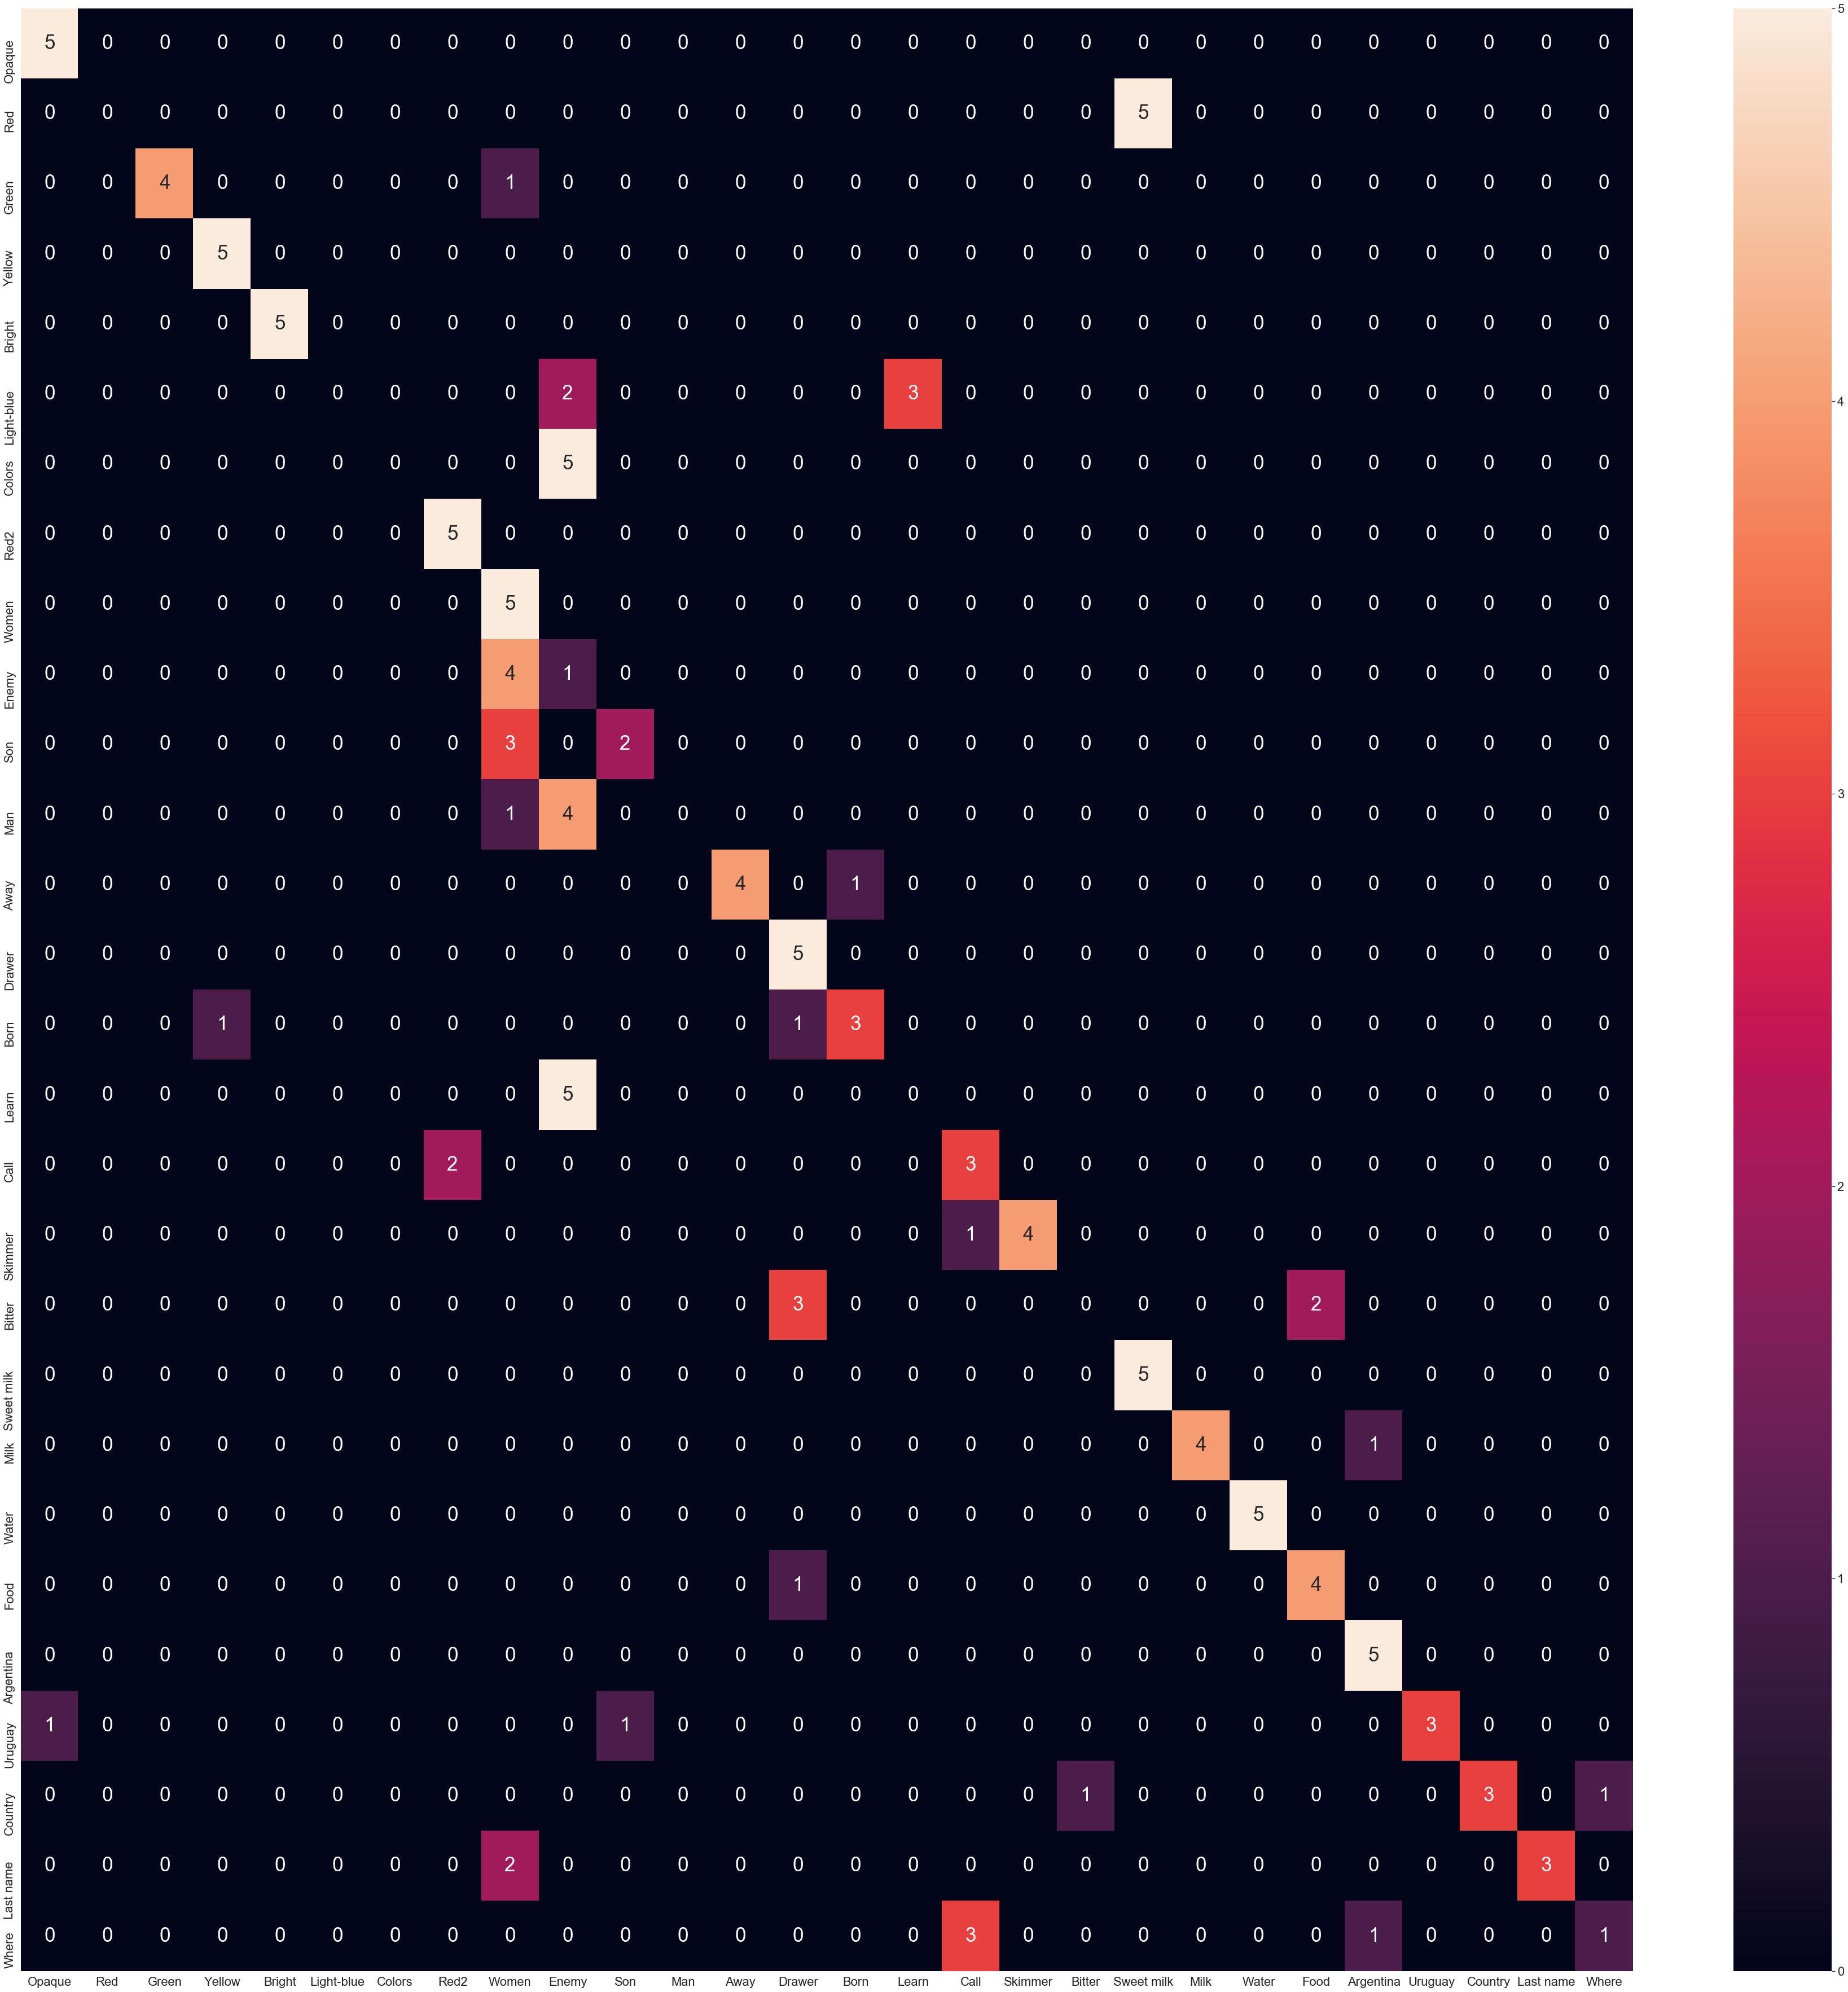

In [5]:
#for prefix in prefixes:
prefix = 1
with open(os.path.join(result_dir, 'result{}.json'.format(prefix)), 'r') as jfile:
    result = json.load(jfile)
        
# Isolate the targets and predictions
target = [int(entry[0]) for entry in result]
prediction = [int(entry[1]) for entry in result]
    
# Plot and save the confusion matrix
matrix = confusion_matrix(target, prediction)
df_cm = pd.DataFrame(matrix, classes, classes)
    
plt.figure(figsize=(64, 64))
sns.set(font_scale=2.0)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 35})
plt.savefig(os.path.join(result_dir, 'confusion{}.png'.format(prefix)))
    

In [6]:
type (matrix)

numpy.ndarray

In [7]:
acc = 0
total = 0
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if i == j:
            acc += matrix[i][j]
        total += matrix[i][j]

print('Accuracy : ' + str(float(acc / total * 100)) + '%')

Accuracy : 60.0%
